In [2]:
import pandas as pd
from scipy.io import arff
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

data, meta = arff.loadarff(r'C:\Users\gzmce\OneDrive - Firat University\Masaüstü\artificalGerekli\D31.arff')
df = pd.DataFrame(data)
df

,x,y,class
0,25.0514,5.7475,b'1'
1,26.6614,7.3414,b'1'
2,25.2653,6.2466,b'1'
3,25.2285,4.7447,b'1'
4,25.7529,5.1564,b'1'
...,...,...,...
3095,5.1380,16.6150,b'31'
3096,5.7360,16.9991,b'31'
3097,5.2760,17.2475,b'31'
3098,6.4444,16.2033,b'31'


In [3]:
pd.DataFrame(data)["class"].value_counts()

class
b'1'     100
b'17'    100
b'30'    100
b'29'    100
b'28'    100
b'27'    100
b'26'    100
b'25'    100
b'24'    100
b'23'    100
b'22'    100
b'21'    100
b'20'    100
b'19'    100
b'18'    100
b'16'    100
b'2'     100
b'15'    100
b'14'    100
b'13'    100
b'12'    100
b'11'    100
b'10'    100
b'9'     100
b'8'     100
b'7'     100
b'6'     100
b'5'     100
b'4'     100
b'3'     100
b'31'    100
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler

# Sayısal verileri al
X = np.column_stack((data['x'], data['y']))

# Standartlaştırma
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
data_pd = pd.DataFrame(data)
data_pd["class"] = data_pd["class"].apply(lambda c : c.decode("utf-8"))
data_pd["class"] = data_pd["class"].apply(lambda c : int(c) if c != 'noise' else -1)
data_pd #classları sayısal yaptık.

,x,y,class
0,25.0514,5.7475,1
1,26.6614,7.3414,1
2,25.2653,6.2466,1
3,25.2285,4.7447,1
4,25.7529,5.1564,1
...,...,...,...
3095,5.1380,16.6150,31
3096,5.7360,16.9991,31
3097,5.2760,17.2475,31
3098,6.4444,16.2033,31


### k means

In [6]:
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=31, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [7]:
from sklearn.metrics import normalized_mutual_info_score
normalized_mutual_info_score(data_pd["class"],y_kmeans) 

0.9525919501925557

In [8]:
import time

start = time.time()

kmeans = KMeans(n_clusters=31, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 0.0426 saniye


### agglomerative

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

X = df.iloc[:, [0, 1]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=31)
labels_agg = agg.fit_predict(X_scaled)

In [10]:
normalized_mutual_info_score(data_pd["class"],labels_agg) 

0.9504552809372949

In [11]:
import time

start = time.time()

agg = AgglomerativeClustering(n_clusters=31)
labels_agg = agg.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 0.2498 saniye


### dbscan

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Kategorik sütunları decode et (gerekliyse)
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# X ve Y özelliklerini al
X = df.iloc[:, [0, 1]].values

# Standardizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN modelini oluştur
dbscan = DBSCAN(eps=0.2)
labels = dbscan.fit_predict(X_scaled)

In [13]:
normalized_mutual_info_score(data_pd["class"],labels) 

0.08054819010818476

In [14]:
import time

start = time.time()

dbscan = DBSCAN(eps=0.2)
labels = dbscan.fit_predict(X_scaled)

end = time.time()
print(f"K-Means çalışma süresi: {end - start:.4f} saniye")

K-Means çalışma süresi: 0.0384 saniye


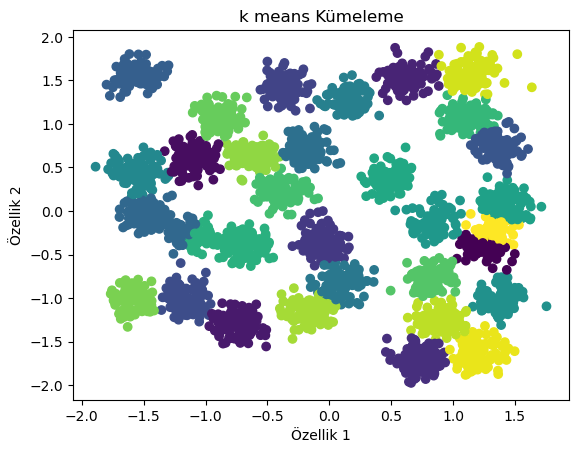

In [15]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.title('k means Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

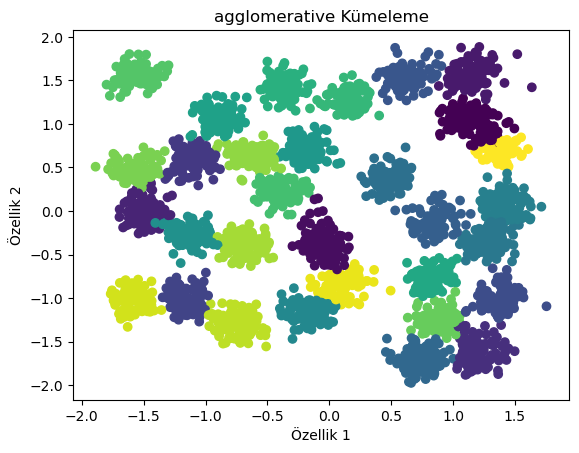

In [16]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='viridis')
plt.title('agglomerative Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

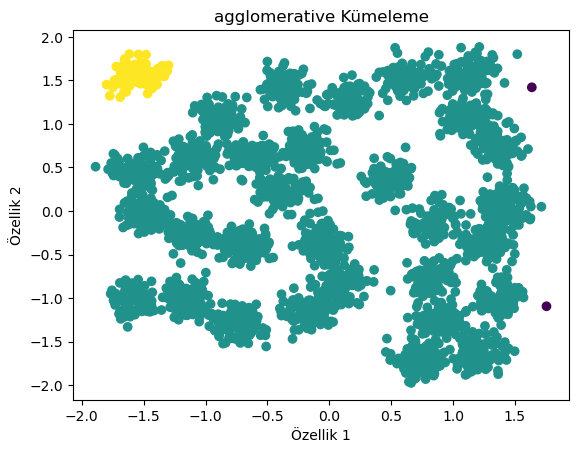

In [17]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.title('agglomerative Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()

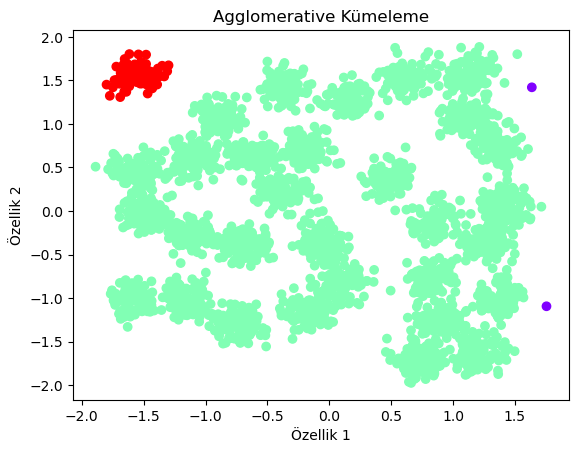

In [18]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.title('Agglomerative Kümeleme')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.show()


In [19]:
import numpy as np

print("Farklı sınıf sayısı:", len(np.unique(labels)))
print("Sınıflar:", np.unique(labels))


Farklı sınıf sayısı: 3
Sınıflar: [-1  0  1]


In [20]:
import numpy as np
print("Kaç küme var:", len(np.unique(labels_agg)))
print("Küme etiketleri:", np.unique(labels_agg))


Kaç küme var: 31
Küme etiketleri: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]


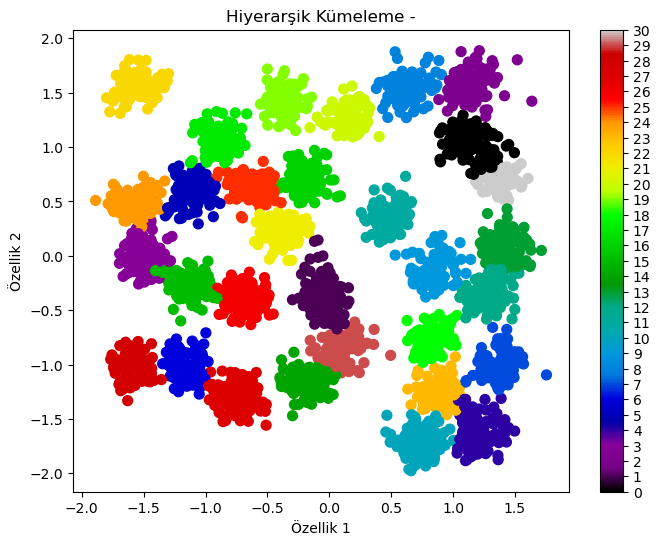

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_agg, cmap='nipy_spectral', s=50)
plt.title('Hiyerarşik Kümeleme -')
plt.xlabel('Özellik 1')
plt.ylabel('Özellik 2')
plt.colorbar(ticks=range(31))  # Küme numaralarını gösteren renk barı
plt.show()
